# Import libraries and read csv file into DataFrame

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

df = pd.read_csv('example_output_rates.csv', index_col=0)

df

,AREA,RATIO,CIRCULARITY,LENGTH,PERIMETER,STRING,CONCENTRATION,GROWTH
0,0.004812,0.004346,-0.007864,0.007087,0.006338,16,0.0,1
1,0.009479,0.000218,-0.006588,0.008193,0.008033,16,0.0,1
2,0.008181,0.010873,-0.006254,0.009161,0.007218,16,0.0,1
3,0.012376,0.011386,-0.006329,0.010944,0.009353,16,0.0,1
4,0.008357,0.000822,-0.000596,0.005009,0.004476,16,0.0,1
...,...,...,...,...,...,...,...,...
1333,0.007230,0.003263,-0.001796,0.004656,0.004513,142,50.0,0
1334,0.008641,-0.001582,0.000483,0.004287,0.004079,142,50.0,0
1335,0.006322,0.000359,-0.000242,0.004035,0.003282,142,50.0,0
1336,0.005537,-0.000665,-0.000663,0.003749,0.003100,142,50.0,0


# kNN Model and Confusion Matrix

Accuracy: 0.8980099502487562


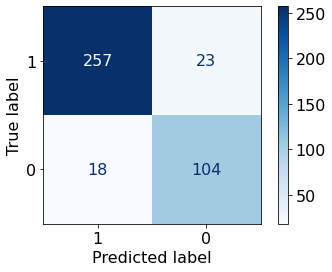

In [6]:
knn_features_all = ['AREA', 'RATIO', 'CIRCULARITY', 'LENGTH', 'PERIMETER']

X = df[knn_features_all]
y = df.GROWTH
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
    
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(knn, X_test, y_test, labels=[1,0], cmap=plt.cm.Blues)  
plt.show()

# NN Model and Confusion Matrix 

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       147
           1       0.84      0.91      0.87       255

    accuracy                           0.83       402
   macro avg       0.83      0.80      0.81       402
weighted avg       0.83      0.83      0.83       402



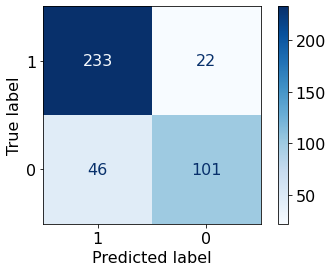

In [7]:
nn_df = df

nn_features = ['AREA', 'RATIO', 'CIRCULARITY', 'LENGTH', 'PERIMETER']

X = nn_df[nn_features]
y = nn_df['GROWTH']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    
mlp = MLPClassifier(solver="adam", alpha=1, random_state=1, hidden_layer_sizes=(2, 2),max_iter=2000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
    
print(classification_report(y_test,predictions))
    
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(mlp, X_test, y_test, labels=[1,0], cmap=plt.cm.Blues)  
plt.show()

# kNN - Multiple model runs

In [8]:
# MULTIPLE RUNS - ACCURACIES - run model ten times to get range of accuracies - kNN

df

knn_features_all = ['AREA', 'RATIO', 'CIRCULARITY', 'LENGTH', 'PERIMETER']

for i in range(10):
    
    X = df[knn_features_all]
    y = df.GROWTH
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    knn = KNeighborsClassifier(n_neighbors = 10)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    print(f"Number: {i+1}")
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Number: 1
Accuracy: 0.8557213930348259
Number: 2
Accuracy: 0.8905472636815921
Number: 3
Accuracy: 0.9154228855721394
Number: 4
Accuracy: 0.917910447761194
Number: 5
Accuracy: 0.8930348258706468
Number: 6
Accuracy: 0.8805970149253731
Number: 7
Accuracy: 0.9154228855721394
Number: 8
Accuracy: 0.8805970149253731
Number: 9
Accuracy: 0.8980099502487562
Number: 10
Accuracy: 0.900497512437811


# NN - Multiple model runs 

In [9]:
# MULTIPLE RUNS - ACCURACIES - run model ten times to get range of accuracies - NN

nn_df = df

nn_features = ['AREA', 'RATIO', 'CIRCULARITY', 'LENGTH', 'PERIMETER']

for i in range(10):
    
    X = nn_df[nn_features]
    y = nn_df['GROWTH']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    mlp = MLPClassifier(solver="adam", alpha=1, random_state=1, hidden_layer_sizes=(2, 2),max_iter=2000)
    mlp.fit(X_train,y_train)
    predictions = mlp.predict(X_test)
    
    score = mlp.score(X_test, y_test)
    
    print(f"Number: {i+1}")
    print(f"score: {score:.3f}".lstrip("0"))

Number: 1
score: 0.861
Number: 2
score: 0.868
Number: 3
score: 0.848
Number: 4
score: 0.843
Number: 5
score: 0.848
Number: 6
score: 0.851
Number: 7
score: 0.858
Number: 8
score: 0.858
Number: 9
score: 0.866
Number: 10
score: 0.848
